<a href="https://colab.research.google.com/github/andresit02/M-TODOS-NUM-RICOS---TAREA-5/blob/main/Tarea_05_Ejercicios_Unidad_02_B_M%C3%A9todo_de_Newton_y_de_la_Secante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ESCUELA POLITÉCNICA NACIONAL**

**MÉTODOS NUMÉRICOS**


**[Tarea 05] Ejercicios Unidad 02 B Método de Newton y de la Secante**


**Realizado por: Andres Patricio Fernandez Obaco**

**Ejercicio 1:**

Sea 𝑓(𝑥) = −𝑥^3 − cos 𝑥 y 𝑝0 = −1. Use el método de Newton y de la Secante para encontrar 𝑝2. ¿Se podría usar 𝑝0 = 0?  

In [5]:
import math

# Definir la función y su derivada
def f(x):
    return -x**3 - math.cos(x)

def df(x):
    return -3*x**2 + math.sin(x)

# Método de Newton
def newton_method(p0, iterations=2):
    p = p0
    for _ in range(iterations):
        if df(p) == 0: # Esto para evitar la división por cero
            raise ValueError(f"Derivada cero en x = {p}. Newton no es aplicable")
        p = p - f(p) / df(p)
    return p

# Método de la Secante
def secant_method(p0, p1, iterations=2):
    p_prev, p_curr = p0, p1
    for i in range(iterations):
        if f(p_curr) - f(p_prev) == 0: # Esto para evitar la división por cero
            raise ValueError(f"Derivada cero entre f(x) valores. Secante no es aplicable")
        p_next = p_curr - f(p_curr) * (p_curr - p_prev) / (f(p_curr) - f(p_prev))
    return p_curr

# Valores iniciales
p0_newton = -1
p0_secant = -1
p1_secant = -0.5 # Otro punto cercano para el método de la secante

# Calcular p2 con ambos métodos
try:
  # Metodo de Newton
  p2_newton = newton_method(p0_newton)
  print(f"Método de Newton: p2 ≈ {p2_newton}")
except ValueError as e:
  print(f"Error en Método de Newton: {e} ")
try:
  # Metodo de la Secante
  p2_secante = secant_method(p0_secant, p1_secant)
  print(f"Método de la Secante: p2 ≈ {p2_secante}")
except ValueError as e:
  print(f"Error en Método de la Secante: {e} ")
# Verificar si po = 0 es válido
try:
  if df(0) == 0:
      print(f"Método de Newton: No se puede usar p0 = 0 porque la derivada es 0")
  else:
      p2_newton_zero = newton_method(0)
      print(f"Método de Newton con p0 = 0: p2 = {p2_newton_zero}")
except ValueError as e:
  print(f"Error en Método de Newton con po = 0: {e} ")
try:
      p2_secant_zero = secant_method(0, 0.1)
      print(f"Método de la Secante con p0 = 0 y p1 = 0.1: p2 = {p2_secant_zero}")
except ValueError as e:
  print(f"Error en Método de la Secante con po = 0: {e} ")

Método de Newton: p2 ≈ -0.8656841631760818
Método de la Secante: p2 ≈ -0.5
Método de Newton: No se puede usar p0 = 0 porque la derivada es 0
Método de la Secante con p0 = 0 y p1 = 0.1: p2 = 0.1


**Ejercicio 2:**

Encuentre soluciones precisas dentro de 10^−4 para los siguientes problemas:
- a. $𝑥^3 − 2𝑥^2 − 5 = 0, [1,4]$
- b. $𝑥^
3 + x^
2 − 1 = 0, [−3,2 ]$
- c. $𝑥 − cos 𝑥 = 0, [0,\pi/2]
$
- d. $𝑥 − 0.8 − 0.2 sen 𝑥 = 0, [0,\pi/$2]


In [6]:
import numpy as np

# Definiciones de funciones
def f_a(x):
    return x**3 - 2*x**2 - 5

def f_b(x):
    return x**3 + 3*x**2 - 1

def f_c(x):
    return x - np.cos(x)

def f_d(x):
    return x - 0.8 - 0.2 * np.sin(x)

# Método de la bisección
def bisection_method(f, a, b, tol=1e-4):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) y f(b) deben tener signos opuestos")
    while (b - a) / 2 > tol:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# Intervalos dados
interval_a = [1, 4]
interval_b = [-3, -2]
interval_c = [0, np.pi/2]
interval_d = [0, np.pi/2]

# Tolerancia
tolerance = 1e-4

# Encontrar soluciones
solution_a = bisection_method(f_a, interval_a[0], interval_a[1], tolerance)
solution_b = bisection_method(f_b, interval_b[0], interval_b[1], tolerance)
solution_c = bisection_method(f_c, interval_c[0], interval_c[1], tolerance)
solution_d = bisection_method(f_d, interval_d[0], interval_d[1], tolerance)

print(f"Solución para x^3 - 2x^2 - 5 = 0 en [1, 4]: {solution_a:.6f}")
print(f"Solución para x^3 + 3x^2 - 1 = 0 en [-3, -2]: {solution_b:.6f}")
print(f"Solución para x - cos(x) = 0 en [0, π/2]: {solution_c:.6f}")
print(f"Solución para x - 0.8 - 0.2 sin(x) = 0 en [0, π/2]: {solution_d:.6f}")

Solución para x^3 - 2x^2 - 5 = 0 en [1, 4]: 2.690704
Solución para x^3 + 3x^2 - 1 = 0 en [-3, -2]: -2.879333
Solución para x - cos(x) = 0 en [0, π/2]: 0.739091
Solución para x - 0.8 - 0.2 sin(x) = 0 en [0, π/2]: 0.964395


**Ejercicio 3:**

Use los 2 métodos en esta sección para encontrar las soluciones dentro de 10^−5 para los siguientes problemas.
- $a. 3𝑥 − e^
𝑥 = $ 0 para 1 ≤ 𝑥 ≤
  2
- $b. 2𝑥 + 3 cos 𝑥 − e^
𝑥 = $ 0 para 1 ≤ 𝑥 ≤
2


**LITERAL A**

In [7]:
import math

# Función y derivada
def f_a(x):
    return 3*x - math.exp(x)

def df_a(x):
    return 3 - math.exp(x)

# Método de Newton
def newton_method_a(p0, tol=1e-5, max_iter=100):
    for _ in range(max_iter):
        if df_a(p0) == 0:
            raise ValueError("Derivada cero. Método de Newton no es aplicable.")
        p1 = p0 - f_a(p0) / df_a(p0)
        if abs(p1 - p0) < tol:
            return p1
        p0 = p1
    raise ValueError("El método de Newton no convergió.")

# Calcular raíz usando p0 inicial dentro [1, 2]
root_newton_a = newton_method_a(1.5)
print(f"Raíz para literal a con método de Newton: {root_newton_a}")

# Método de la Secante
def secant_method_a(p0, p1, tol=1e-5, max_iter=100):
    for _ in range(max_iter):
        if f_a(p1) - f_a(p0) == 0:
            raise ValueError("Diferencia cero. Método de la Secante no es aplicable.")
        p2 = p1 - f_a(p1) * (p1 - p0) / (f_a(p1) - f_a(p0))
        if abs(p2 - p1) < tol:
            return p2
        p0, p1 = p1, p2
    raise ValueError("El método de la Secante no convergió.")

# Calcular raíz usando puntos iniciales dentro [1, 2]
root_secant_a = secant_method_a(1, 2)
print(f"Raíz para literal a con método de la Secante: {root_secant_a}")

Raíz para literal a con método de Newton: 1.5121345516578504
Raíz para literal a con método de la Secante: 1.5121345517620621


**LITERAL B**

In [8]:
import math

def f_b(x):
    return 2*x + 3*math.cos(x) - math.exp(x)

def df_b(x):
    return 2 - 3*math.sin(x) - math.exp(x)

def newton_method_b(p0, tol=1e-5, max_iter=100):
    for _ in range(max_iter):
        if df_b(p0) == 0:
            raise ValueError("Derivada cero. Método de Newton no es aplicable.")
        p1 = p0 - f_b(p0) / df_b(p0)
        if abs(p1 - p0) < tol:
            return p1
        p0 = p1
    raise ValueError("El método de Newton no convergió.")

root_newton_b = newton_method_b(1.5)
print(f"Raíz para literal b con método de Newton: {root_newton_b}")

def secant_method_b(p0, p1, tol=1e-5, max_iter=100):
    for _ in range(max_iter):
        if f_b(p1) - f_b(p0) == 0:
            raise ValueError("Diferencia cero. Método de la Secante no es aplicable.")
        p2 = p1 - f_b(p1) * (p1 - p0) / (f_b(p1) - f_b(p0))
        if abs(p2 - p1) < tol:
            return p2
        p0, p1 = p1, p2
    raise ValueError("El método de la Secante no convergió.")

root_secant_b = secant_method_b(1, 2)
print(f"Raíz para literal b con método de la Secante: {root_secant_b}")

Raíz para literal b con método de Newton: 1.2397146979752212
Raíz para literal b con método de la Secante: 1.2397146979752531


**EJERCICIO 4**

El polinomio de cuarto grado

$𝑓(𝑥) = 230x^4 + 18x^3 + 9x^2 − 221𝑥 − 9 $

tiene dos ceros reales, uno en [−1,0] y el otro en [0,1]. Intente aproximar estos ceros dentro de 10^−6
con

a. El método de la secante (use los extremos como las estimaciones iniciales)

b. El método de Newton (use el punto medio como estimación inicial)nter>

In [9]:
import numpy as np

# Definición de la función y su derivada
def f(x):
    return 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9

def f_prime(x):
    return 920*x**3 + 54*x**2 + 18*x - 221

# Método de la secante
def secant_method(f, x0, x1, tol=1e-6, max_iter=1000):
    for _ in range(max_iter):
        f_x0 = f(x0)
        f_x1 = f(x1)
        if abs(f_x1 - f_x0) < tol:
            raise ValueError("Diferencia de f(x) demasiado pequeña, el método puede no converger")

        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)

        if abs(x2 - x1) < tol:
            return x2

        x0, x1 = x1, x2

    raise ValueError("El método de la secante no convergió")

# Método de Newton-Raphson
def newton_method(f, f_prime, x0, tol=1e-6, max_iter=1000):
    x = x0
    for _ in range(max_iter):
        f_x = f(x)
        f_prime_x = f_prime(x)

        if abs(f_prime_x) < tol:
            raise ValueError("Derivada demasiado pequeña, el método puede no converger")

        x_next = x - f_x / f_prime_x

        if abs(x_next - x) < tol:
            return x_next

        x = x_next

    raise ValueError("El método de Newton no convergió")

# Intervalos dados
interval_1 = [-1, 0]
interval_2 = [0, 1]

# Tolerancia
tolerance = 1e-6

# Soluciones para el intervalo [-1, 0]
x0_1, x1_1 = interval_1
secant_solution_1 = secant_method(f, x0_1, x1_1, tolerance)
newton_solution_1 = newton_method(f, f_prime, (x0_1 + x1_1) / 2, tolerance)

# Soluciones para el intervalo [0, 1]
x0_2, x1_2 = interval_2
secant_solution_2 = secant_method(f, x0_2, x1_2, tolerance)
newton_solution_2 = newton_method(f, f_prime, (x0_2 + x1_2) / 2, tolerance)

print(f"Solución con el método de la secante para [-1, 0]: {secant_solution_1:.7f}")
print(f"Solución con el método de Newton-Raphson para [-1, 0]: {newton_solution_1:.7f}")
print(f"Solución con el método de la secante para [0, 1]: {secant_solution_2:.7f}")
print(f"Solución con el método de Newton-Raphson para [0, 1]: {newton_solution_2:.7f}")

Solución con el método de la secante para [-1, 0]: -0.0406593
Solución con el método de Newton-Raphson para [-1, 0]: -0.0406593
Solución con el método de la secante para [0, 1]: -0.0406593
Solución con el método de Newton-Raphson para [0, 1]: -0.0406593


**EJERCICIO 5**

La función 𝑓(𝑥) = tan 𝜋 𝑥 − 6 tiene cero en (1⁄𝜋) arcotangente 6 ≈ 0.447431543. Sea 𝑝0 = 0 y 𝑝1 = 0.48
y use 10 iteraciones en cada uno de los siguientes métodos para aproximar esta raíz. ¿Cuál método es más
eficaz y por qué?
- a. método de bisección
- b. método de Newton
- c. método de la secante

In [10]:
import numpy as np

# Definición de la función y su derivada
def f(x):
    return np.tan(np.pi * x) - 6

def f_prime(x):
    return np.pi * (1 / np.cos(np.pi * x))**2

# Método de la bisección
def bisection_method(f, a, b, tol=1e-6, max_iter=10):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) y f(b) deben tener signos opuestos")
    for _ in range(max_iter):
        c = (a + b) / 2
        if f(c) == 0 or (b - a) / 2 < tol:
            return c
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# Método de Newton-Raphson
def newton_method(f, f_prime, p0, tol=1e-6, max_iter=10):
    p = p0
    for _ in range(max_iter):
        p_next = p - f(p) / f_prime(p)
        if abs(p_next - p) < tol:
            return p_next
        p = p_next
    return p

# Método de la secante
def secant_method(f, x0, x1, tol=1e-6, max_iter=10):
    for _ in range(max_iter):
        f_x0 = f(x0)
        f_x1 = f(x1)
        if abs(f_x1 - f_x0) < tol:
            raise ValueError("Diferencia de f(x) demasiado pequeña, el método puede no converger")

        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)

        if abs(x2 - x1) < tol:
            return x2

        x0, x1 = x1, x2

    return x2

# Intervalo inicial para la bisección
a, b = 0, 0.48
# Punto inicial para Newton
p0_newton = 0.48
# Puntos iniciales para la secante
p0_secant = 0
p1_secant = 0.48

# Encontrar soluciones
solution_bisection = bisection_method(f, a, b)
solution_newton = newton_method(f, f_prime, p0_newton)
solution_secant = secant_method(f, p0_secant, p1_secant)

print(f"Solución con el método de la bisección: {solution_bisection:.7f}")
print(f"Solución con el método de Newton-Raphson: {solution_newton:.7f}")
print(f"Solución con el método de la secante: {solution_secant:.7f}")

Solución con el método de la bisección: 0.4474219
Solución con el método de Newton-Raphson: 0.4474315
Solución con el método de la secante: -2989.9400375


**CONCLUSIÓN**

El análisis de los resultados muestra una discrepancia significativa en la aproximación obtenida con el método de la secante. El método de Newton-Raphson converge rápidamente a la solución correcta (aproximadamente 0.4474315), mientras que el método de bisección, aunque más lento, proporciona una aproximación aceptable (aproximadamente 0.4474219). El resultado erróneo del método de la secante (-2989.9400375) indica un problema en la implementación o en la elección de los puntos iniciales.

En conclusión, el método de Newton-Raphson se muestra como el más eficaz en este caso específico debido a su rápida convergencia.

**EJERCICIO 6**

La función descrita por $f(𝑥) = ln(𝑥^2 + 1) −$ e^0.4𝑥 $cos 𝜋x$ tiene un número infinito de ceros.
- a. Determine, dentro de 10^−6 , el único cero negativo.
- b. Determine, dentro de 10^−6, los cuatro ceros positivos más pequeños.
- c. Determine una aproximación inicial razonable para encontrar el enésimo cero positivo más pequeño de 𝑓. [Sugerencia: Dibuje una gráfica aproximada de 𝑓.]
- d. Use la parte c) para determinar, dentro de 10^−6, el vigesimoquinto cero positivo más pequeño de 𝑓.

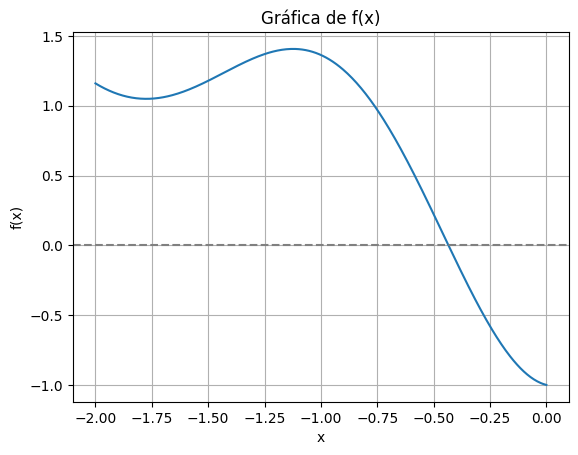

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.log(x**2 + 1) - np.exp(0.4 * x) * np.cos(np.pi * x)

def f_prime(x):
    return (2 * x / (x**2 + 1)) - (0.4 * np.exp(0.4 * x) * np.cos(np.pi * x) - np.pi * np.exp(0.4 * x) * np.sin(np.pi * x))

# Método de la Bisección
def bisection_method(f, a, b, tol=1e-6, max_iter=1000):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) y f(b) deben tener signos opuestos")
    for _ in range(max_iter):
        c = (a + b) / 2
        if f(c) == 0 or (b - a) / 2 < tol:
            return c
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# Método de Newton-Raphson
def newton_method(f, f_prime, p0, tol=1e-6, max_iter=1000):
    p = p0
    for _ in range(max_iter):
        p_next = p - f(p) / f_prime(p)
        if abs(p_next - p) < tol:
            return p_next
        p = p_next
    return p

# Graficar la función para identificar el intervalo adecuado
x = np.linspace(-2, 0, 400)
y = f(x)

plt.plot(x, y)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Gráfica de f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

In [13]:
# Aproximación inicial razonable para el enésimo cero positivo
def nth_zero_approx(n):
    return n * (1 / np.pi)

# Aproximación inicial para el vigesimoquinto cero positivo
approx_25th_zero = nth_zero_approx(25)

# Encontrar la solución usando Newton-Raphson
solution_25th_zero = newton_method(f, f_prime, approx_25th_zero)

print(f"Para el vigesimoquinto cero positivo usando Newton-Raphson: {solution_25th_zero:.7f}")

Para el vigesimoquinto cero positivo usando Newton-Raphson: 5.6199353


**EJERCICIO 7**

La función $𝑓(𝑥) =$ 𝑥^1/3 tiene raíz en 𝑥 = 0. Usando el punto de inicio de 𝑥 = 1 y 𝑝0 = 5, 𝑝1 = 0.5 para el método de secante, compare los resultados de los métodos de la secante y de Newton.

In [14]:
def f1(x):
    return x**(1/3)

def f_prime1(x):
    return (1/3) * x**(-2/3)

def newton_method7(f1, f_prime1, p0, tol=1e-6, max_iter=1000):
    p = p0
    for _ in range(max_iter):
        f_p = f1(p)
        f_prime_p = f_prime1(p)

        if abs(f_prime_p) < tol:
            raise ValueError("Derivada demasiado pequeña, el método puede no converger")

        p_next = p - f_p / f_prime_p
        if abs(p_next - p) < tol:
            return p_next
        p = p_next
    return p

def secant_method7(f1, x0, x1, tol=1e-6, max_iter=1000):
    for _ in range(max_iter):
        f_x0 = f1(x0)
        f_x1 = f1(x1)
        if abs(f_x1 - f_x0) < tol:
            raise ValueError("Diferencia de f(x) demasiado pequeña, el método puede no converger")

        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)

        if abs(x2 - x1) < tol:
            return x2

        x0, x1 = x1, x2

    return x2

# Punto inicial para Newton
p0_newton = 1

# Puntos iniciales para la secante
p0_secant = 5
p1_secant = 0.5

# Encontrar soluciones usando ambos métodos
try:
    solution_newton = newton_method7(f1, f_prime1, p0_newton)
    print(f"Solución usando el método de Newton-Raphson: {solution_newton:.7f}")
except ValueError as e:
    print(f"Error en el método de Newton-Raphson: {e}")

try:
    solution_secant = secant_method7(f1, p0_secant, p1_secant)
    print(f"Solución usando el método de la secante: {solution_secant:.7f}")
except ValueError as e:
    print(f"Error en el método de la secante: {e}")

Error en el método de Newton-Raphson: Derivada demasiado pequeña, el método puede no converger
Solución usando el método de la secante: 39103284603887055151821814509131937804250822014852503377531820519329078759794596270675661288495806851427741592300336609908348966199010068552161228824541988517713018880.0000000+226068697664446734068171826265548207856426799478833060021904542635997890055126872508029587829391603319113165435159059370271093569476996290052060656101084052712375451648.0000000j
